# Classes and Objects! #

## Built in Objects ##

In [68]:
hello_string = 'Hello World'

In [69]:
# Functions to return changes
print(hello_string.lower())
print(hello_string.split())

hello world
['Hello', 'World']


In [70]:
# Functions to change the object
hello_string += '!'
print(hello_string)

Hello World!


In [71]:
# Uses built in functions 
print(len(hello_string))

12


In [72]:
# Convert to other types
print(list(hello_string))

['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', '!']


## Custom Objects ##

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
class Vector:
    def __init__(self, component_list):
        if len(component_list) != 2:
            raise ValueError('Must provide 2 compontnets. Instead Provided ', component_list)
        
        self.x = component_list[0]
        self.y = component_list[1]
    
    def __str__(self):
        return u'\u3008{:.6g}, {:.6g}\u3009'.format(self.x, self.y)
    
    def __mul__(self, other):
        a = float(other)
        return Vector([self.x*a,self.y*a])
    
    def __truediv__(self, other):
        a = float(other)
        return Vector([self.x/a,self.y/a])
        
    def __add__(self, other):
        return Vector([self.x+other.x, self.y+other.y])
        
    def __sub__(self, other):
        return Vector([self.x-other.x, self.y-other.y])
        
    def mag(self):
        return np.sqrt(self.x**2 + self.y**2)
    
    def direction(self):
        return self/self.mag()
    
    def __iter__(self):
        for i in range(2):
            if i == 0:
                yield self.x
            else:
                yield self.y    
    

In [106]:
class Wire:
    def __init__(self, current):
        self.i = current
        
    def B(self, location):
        r_hat = location.direction()
        b_hat = Vector([r_hat.y, r_hat.x])
        return b_hat*mu_0*self.i/(2*np.pi*location.mag())

In [107]:
class World:
    def __init__(self):
        self.wires = {}
        
    def add_wire(self, wire, location):
        self.wires[wire] = location

    def B(self, location):
        B = Vector([0,0])
        for wire, wire_loc in  self.wires.items():
            B += wire.B(location - wire_loc)
            
        return B


# Units and Constants #

# Something Useful #

# Something Useful #

In [109]:
experiment = World()
experiment.add_wire(Wire(1*mA), Vector([-1,1])*cm)
experiment.add_wire(Wire(1*mA), Vector([1,1])*cm)
experiment.add_wire(Wire(1*mA), Vector([1,-1])*cm)
experiment.add_wire(Wire(1*mA), Vector([-1,-1])*cm)

In [110]:
print(experiment.B(Vector([2,2]))/nT, 'nT')

〈0.2, 0.2〉 nT


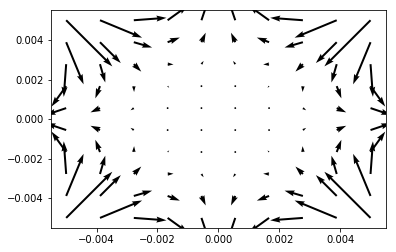

In [123]:
x_range = np.linspace(-.5*cm, .5*cm, 10)
y_range = np.linspace(-.5*cm, .5*cm, 10)



u = np.zeros((10, 10))
v = np.zeros((10, 10))

for m, x in enumerate(x_range):
    for n, y in enumerate(y_range):
        B_mn = experiment.B(Vector([x,y]))
        u[m,n], v[m,n] = B_mn

plt.quiver(x_range, y_range, u, v)